In [1]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2023-03-04 19:07:04--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-03-04 19:07:04 ERROR 403: Forbidden.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import itertools

from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col='Month', skipfooter=2, parse_dates=True)
df.columns = ['Sales']
df.index.freq = 'MS'
df


/tmp/ipykernel_1796/4226646932.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col='Month', skipfooter=2, parse_dates=True)


,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [13]:
# df = df[:-2]
# df

,sales
Month,
1964-01,2815.0
1964-02,2672.0
1964-03,2755.0
1964-04,2721.0
1964-05,2946.0
...,...
1972-05,4618.0
1972-06,5312.0
1972-07,4298.0


<AxesSubplot: xlabel='Month'>

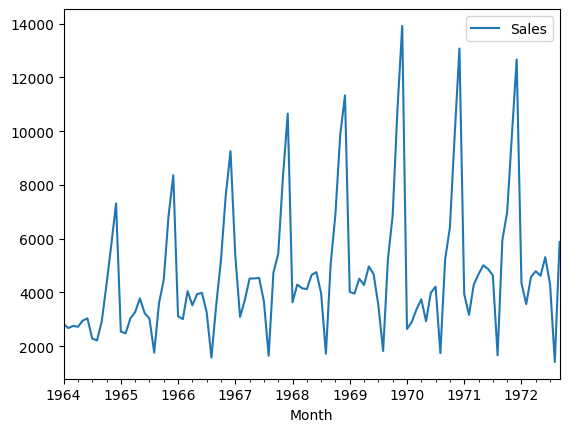

In [5]:
df.plot()

In [7]:
Ntest = 12

train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [23]:
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method='legacy-heuristic',
    trend='add',
    seasonal='mul',
    seasonal_periods=12,
)

res_hw = hw.fit()

# # compute error
# fcast = res_hw.forecast(h)
# error = mean_squared_error(test['sales'], fcast)



In [24]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues
df.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest)

<AxesSubplot: xlabel='Month'>

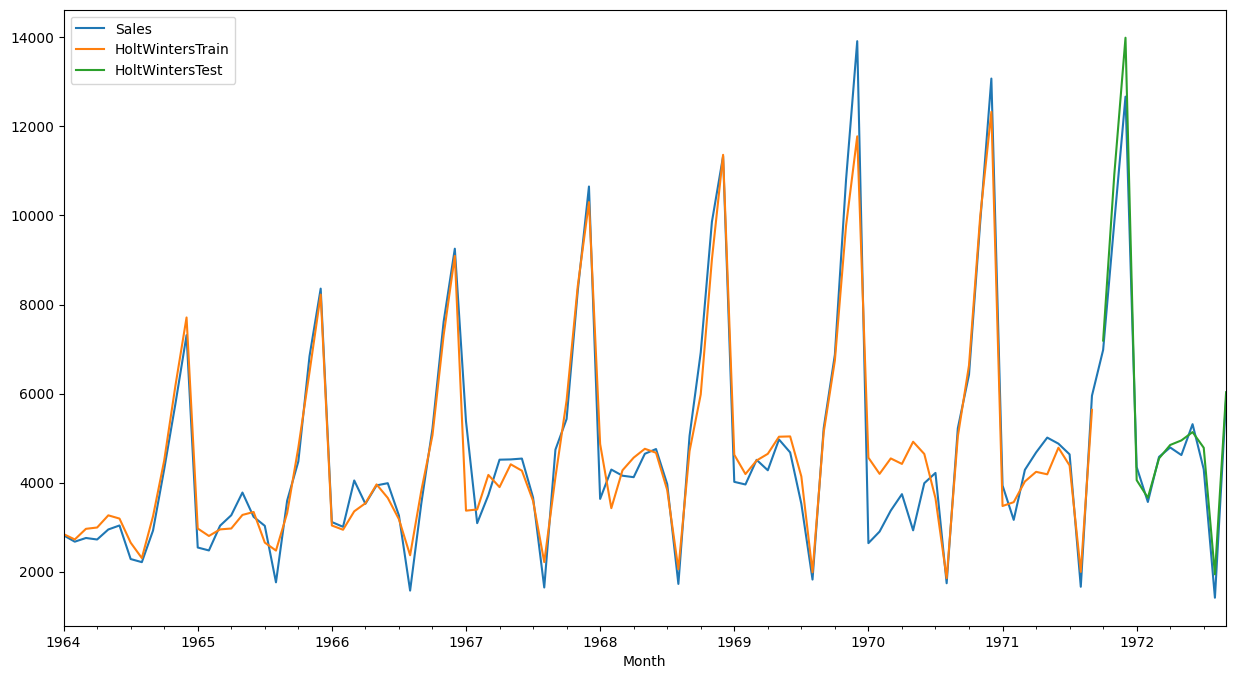

In [25]:
df[['Sales', 'HoltWintersTrain', 'HoltWintersTest']].plot(figsize=(15,8))

In [26]:
r2_score(train['Sales'], res_hw.fittedvalues)

0.9384184741136813

In [27]:
r2_score(test['Sales'], res_hw.forecast(Ntest))

0.9618752540199305